# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [25]:
# Load pickled data
import os
import pickle
import tensorflow as tf

path = os.path.abspath('__file__')
pwd = os.path.dirname(path)
training_file = "./train.p"
validation_file = "./valid.p"
testing_file = "./test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [26]:
import numpy as np

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_validation.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# How many unique classes/labels there are in the dataset.
n_classes = np.unique(train['labels']).size

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [27]:
signs = []
with open("signnames.csv") as f:
    next(f)
    for line in f:
        _, label = line.split(",")
        signs.append(label.strip("\n"))

train_buckets = np.bincount(y_train)
validation_buckets = np.bincount(y_validation)
test_buckets = np.bincount(y_test)

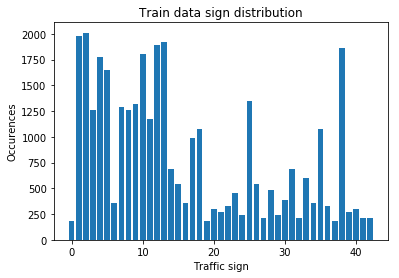

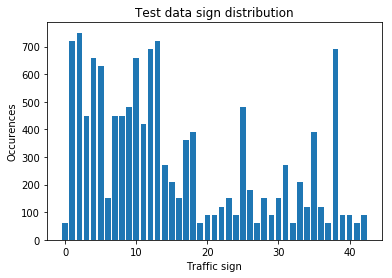

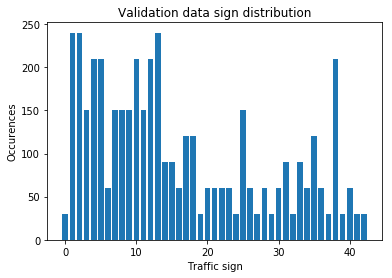

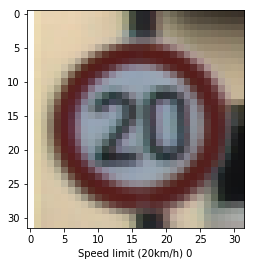

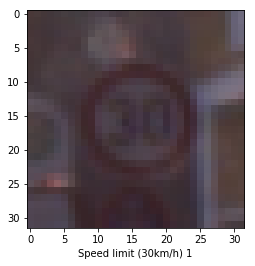

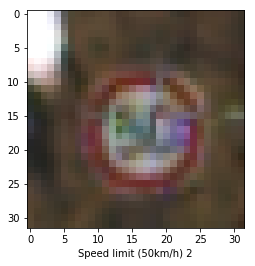

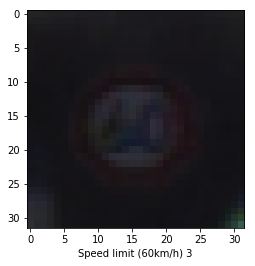

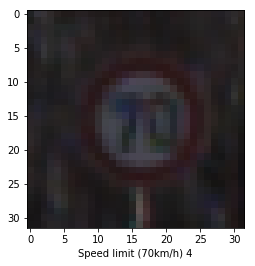

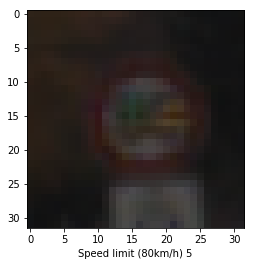

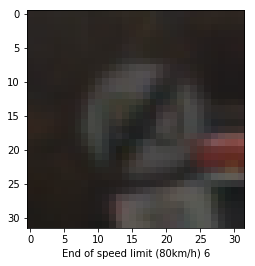

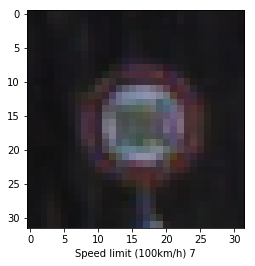

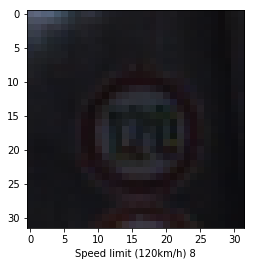

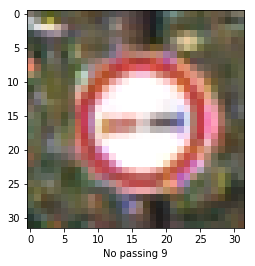

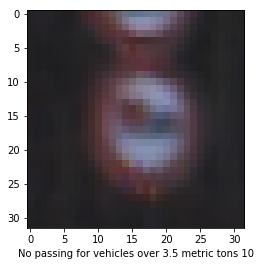

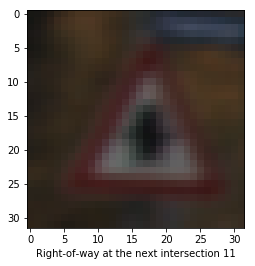

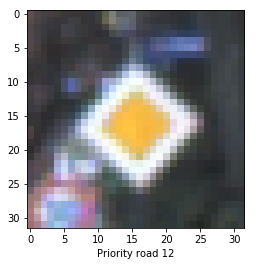

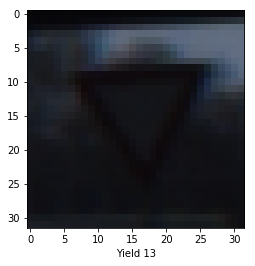

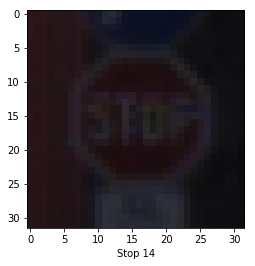

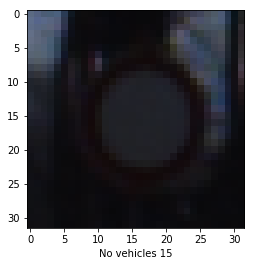

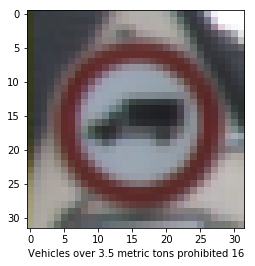

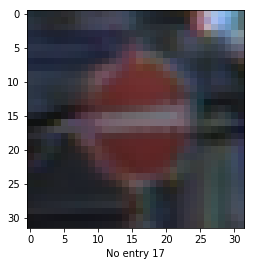

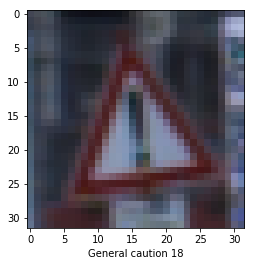

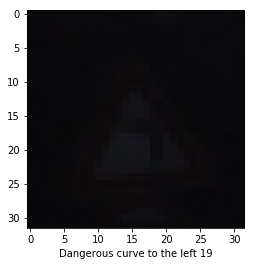

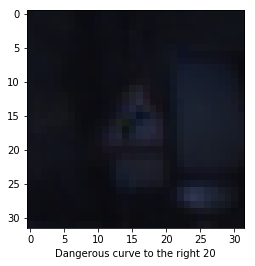

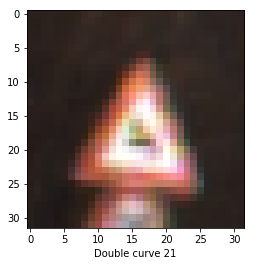

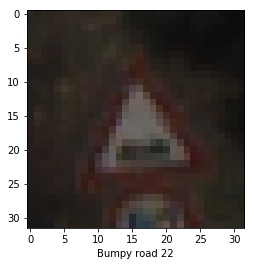

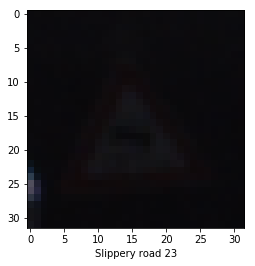

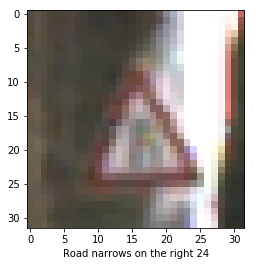

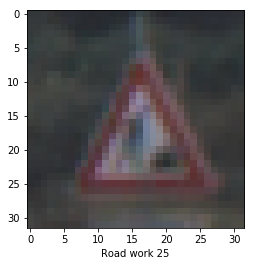

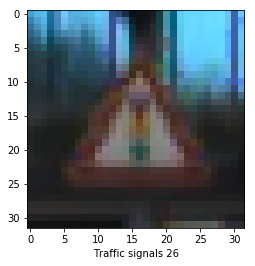

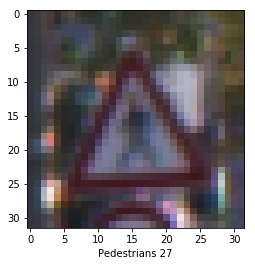

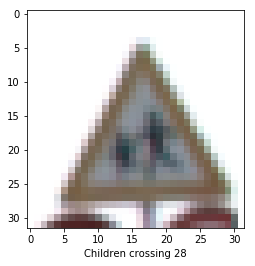

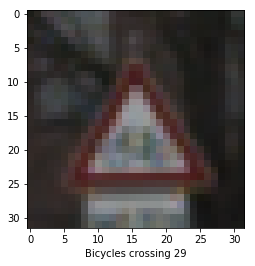

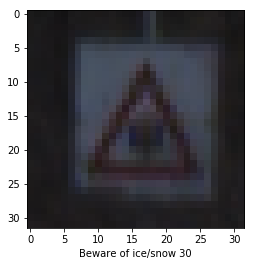

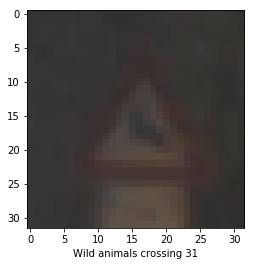

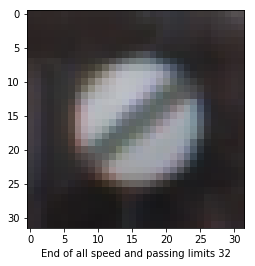

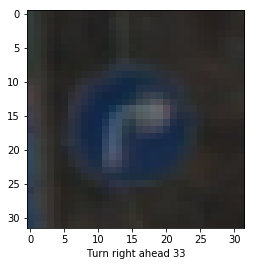

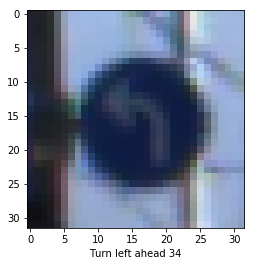

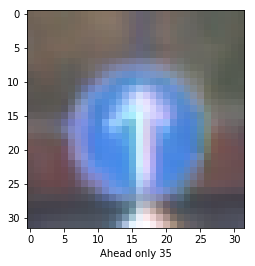

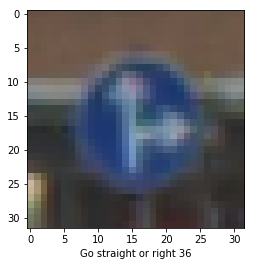

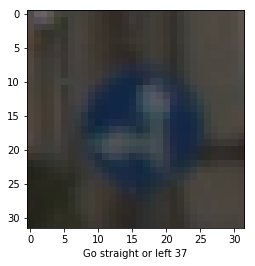

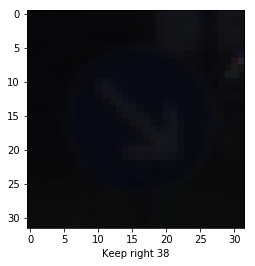

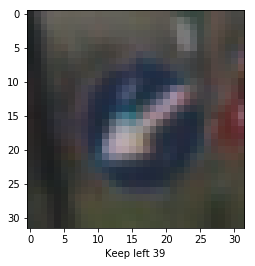

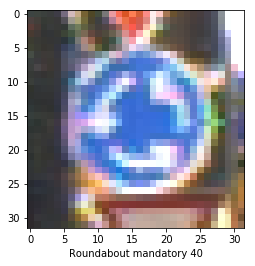

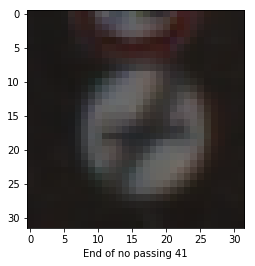

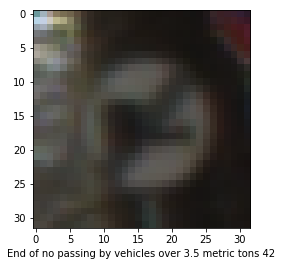

In [31]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# show distribution of train, test and validation sets
plt.bar(range(43), train_buckets)
plt.title("Train data sign distribution")
plt.ylabel("Occurences")
plt.xlabel("Traffic sign")
plt.show()

plt.bar(range(43), test_buckets)
plt.title("Test data sign distribution")
plt.ylabel("Occurences")
plt.xlabel("Traffic sign")
plt.show()

plt.bar(range(43), validation_buckets)
plt.title("Validation data sign distribution")
plt.ylabel("Occurences")
plt.xlabel("Traffic sign")
plt.show()

# show an example of each class
sign_classes, sign_indices = np.unique(y_train, return_index=True)
for sign_class, idx in zip(sign_classes, sign_indices):
    label = signs[sign_class] + " " + str(sign_class)
    plt.xlabel(label)
    plt.imshow(X_train[idx])
    plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import math

from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
variance = np.var(X_train)
mean = np.mean(X_train)

# noramlize the data
X_train = (X_train - mean) / math.sqrt(variance)
X_validation = (X_validation - mean) / math.sqrt(variance)
X_test = (X_test - mean) / math.sqrt(variance)


### Model Architecture

In [6]:
from tensorflow.contrib.layers import flatten

def VGGNet(x):    
    mu = 0
    sigma = 0.05
    x = tf.image.rgb_to_grayscale(x)

    conv1_1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 24), stddev = sigma))
    conv1_1_b = tf.Variable(tf.zeros(24))
    conv1_1   = tf.nn.conv2d(x, conv1_1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_1_b

    conv1_1 = tf.nn.relu(conv1_1)
        
    conv1_2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 24, 24), stddev = sigma))
    conv1_2_b = tf.Variable(tf.zeros(24))
    conv1_2   = tf.nn.conv2d(conv1_1, conv1_2_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_2_b
    
    conv1_2 = tf.nn.relu(conv1_2)
    
    pool1 = tf.nn.max_pool(conv1_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    conv2_1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 24, 48), stddev = sigma))
    conv2_1_b = tf.Variable(tf.zeros(48))
    conv2_1   = tf.nn.conv2d(pool1, conv2_1_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_1_b
    
    conv2_1 = tf.nn.relu(conv2_1)
    
    conv2_2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 48, 48), stddev = sigma))
    conv2_2_b = tf.Variable(tf.zeros(48))
    conv2_2   = tf.nn.conv2d(conv2_1, conv2_2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_2_b
    
    conv2_2 = tf.nn.relu(conv2_2)
    
    pool2 = tf.nn.max_pool(conv2_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    conv3_1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 48, 96), stddev = sigma))
    conv3_1_b = tf.Variable(tf.zeros(96))
    conv3_1   = tf.nn.conv2d(pool2, conv3_1_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_1_b
    
    conv3_1 = tf.nn.relu(conv3_1)
    
    conv3_2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 96, 96), stddev = sigma))
    conv3_2_b = tf.Variable(tf.zeros(96))
    conv3_2   = tf.nn.conv2d(conv3_1, conv3_2_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_2_b
    
    conv3_2 = tf.nn.relu(conv3_2)
    
    conv3_3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 96, 96), stddev = sigma))
    conv3_3_b = tf.Variable(tf.zeros(96))
    conv3_3   = tf.nn.conv2d(conv3_2, conv3_3_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_3_b
    
    conv3_3 = tf.nn.relu(conv3_3)
    
    pool3 = tf.nn.max_pool(conv3_3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    conv4_1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 96, 192), stddev = sigma))
    conv4_1_b = tf.Variable(tf.zeros(192))
    conv4_1   = tf.nn.conv2d(pool3, conv4_1_W, strides=[1, 1, 1, 1], padding='SAME') + conv4_1_b
    
    conv4_1 = tf.nn.relu(conv4_1)
    
    conv4_2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 192, 192), stddev = sigma))
    conv4_2_b = tf.Variable(tf.zeros(192))
    conv4_2   = tf.nn.conv2d(conv4_1, conv4_2_W, strides=[1, 1, 1, 1], padding='SAME') + conv4_2_b
    
    conv4_2 = tf.nn.relu(conv4_2)
    
    conv4_3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 192, 192), stddev = sigma))
    conv4_3_b = tf.Variable(tf.zeros(192))
    conv4_3   = tf.nn.conv2d(conv4_2, conv4_3_W, strides=[1, 1, 1, 1], padding='SAME') + conv4_3_b
    
    conv4_3 = tf.nn.relu(conv4_3)
    
    pool4 = tf.nn.max_pool(conv4_3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    conv5_1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 192, 192), stddev = sigma))
    conv5_1_b = tf.Variable(tf.zeros(192))
    conv5_1   = tf.nn.conv2d(pool4, conv5_1_W, strides=[1, 1, 1, 1], padding='SAME') + conv5_1_b
    
    conv5_1 = tf.nn.relu(conv5_1)
    
    conv5_2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 192, 192), stddev = sigma))
    conv5_2_b = tf.Variable(tf.zeros(192))
    conv5_2   = tf.nn.conv2d(conv5_1, conv5_2_W, strides=[1, 1, 1, 1], padding='SAME') + conv5_2_b
    
    conv5_2 = tf.nn.relu(conv5_2)
    
    conv5_3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 192, 192), stddev = sigma))
    conv5_3_b = tf.Variable(tf.zeros(192))
    conv5_3   = tf.nn.conv2d(conv5_2, conv5_3_W, strides=[1, 1, 1, 1], padding='SAME') + conv5_3_b
    
    conv5_3 = tf.nn.relu(conv5_3)
    
    pool5 = tf.nn.max_pool(conv5_3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    shape = int(np.prod(pool5.get_shape()[1:]))
    fc1w = tf.Variable(tf.truncated_normal([shape, 512], dtype=tf.float32, stddev = sigma))
    fc1b = tf.Variable(tf.zeros(512))
    pool5_flat = tf.reshape(pool5, [-1, shape])
    fc1l = tf.matmul(pool5_flat, fc1w) + fc1b 
    fc1 = tf.nn.relu(fc1l)
        
    fc2w = tf.Variable(tf.truncated_normal([512, 512], dtype=tf.float32, stddev=1e-1))
    fc2b = tf.zeros(512)
    fc2l = tf.matmul(fc1, fc2w) + fc2b
    fc2 = tf.nn.relu(fc2l)
        
    fc3w = tf.Variable(tf.truncated_normal([512, 43],dtype=tf.float32,stddev=1e-1))
    fc3b = tf.zeros(43)
    fc3l = tf.matmul(fc2, fc3w) + fc3b
    
    return fc3l

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [7]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 64

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

learning_rate = 0.001

logits = VGGNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)
   
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [8]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './vgg')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.458

EPOCH 2 ...
Validation Accuracy = 0.856

EPOCH 3 ...
Validation Accuracy = 0.923

EPOCH 4 ...
Validation Accuracy = 0.944

EPOCH 5 ...
Validation Accuracy = 0.954

EPOCH 6 ...
Validation Accuracy = 0.954

EPOCH 7 ...
Validation Accuracy = 0.956

EPOCH 8 ...
Validation Accuracy = 0.955

EPOCH 9 ...
Validation Accuracy = 0.956

EPOCH 10 ...
Validation Accuracy = 0.971

EPOCH 11 ...
Validation Accuracy = 0.948

EPOCH 12 ...
Validation Accuracy = 0.966

EPOCH 13 ...
Validation Accuracy = 0.970

EPOCH 14 ...
Validation Accuracy = 0.954

EPOCH 15 ...
Validation Accuracy = 0.933

EPOCH 16 ...
Validation Accuracy = 0.956

EPOCH 17 ...
Validation Accuracy = 0.963

EPOCH 18 ...
Validation Accuracy = 0.942

EPOCH 19 ...
Validation Accuracy = 0.970

EPOCH 20 ...
Validation Accuracy = 0.955

EPOCH 21 ...
Validation Accuracy = 0.958

EPOCH 22 ...
Validation Accuracy = 0.933

EPOCH 23 ...
Validation Accuracy = 0.930

EPOCH 24 ...
Validation Accura

In [10]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.941


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

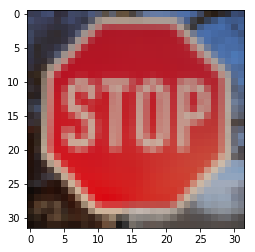

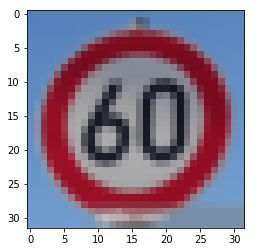

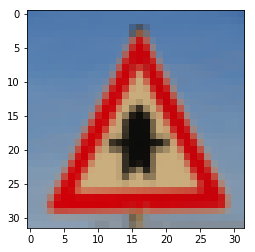

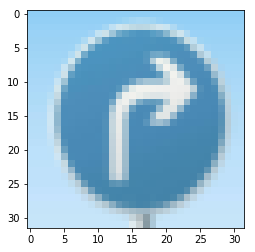

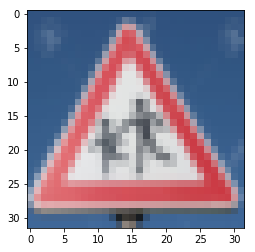

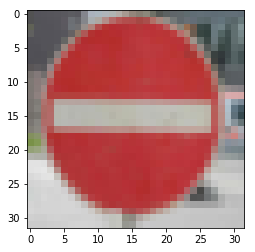

In [73]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc

# Visualizations will be shown in the notebook.
%matplotlib inline

german_signs = np.zeros((6,32,32,3), dtype=np.uint8)
for n in range(6):
    image = plt.imread('additional_images/image'+str(n+1)+'.jpg')
    dim = (32,32)
    resized = scipy.misc.imresize(image, dim)
    german_signs[n,:,:,:]= resized
    fig = plt.figure()
    plt.imshow(german_signs[n])
german_signs = (german_signs - mean) / math.sqrt(variance)


### Predict the Sign Type for Each Image

In [82]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import tensorflow as tf

german_signs_labeled = [14,3,11,33,28,17]
y_german_signs = np.zeros(shape = (6,43))
for i in range(6):
    y_german_signs[i][german_signs_labeled[i]] = 1

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    new_saver = tf.train.import_meta_graph('vgg.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))
    german_softmax = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=6), feed_dict={x: german_signs, keep_prob: 1.0})

predictions = [german_softmax[1][i][0] for i in range(0, 6)]
named_predictions = [signs[i] for i in predictions]
print(named_predictions)

['Stop', 'Speed limit (60km/h)', 'Right-of-way at the next intersection', 'Turn right ahead', 'Children crossing', 'No entry']


## Analyze Performance

In [84]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.]
true_positives = 0
for i in range(6):
    if predictions[i] == german_signs_labeled[i]:
        true_positives += 1 
accuracy = true_positives/6 * 100
print("Accuracy: " + str(accuracy) + "%")

Accuracy: 100.0%


#### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [86]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
print(german_softmax)

TopKV2(values=array([[  9.62431729e-01,   1.92138981e-02,   8.65788013e-03,
          6.45926688e-03,   2.81449803e-03,   1.82466989e-04],
       [  1.00000000e+00,   4.72376790e-11,   1.67313663e-11,
          2.44694846e-12,   1.17204330e-15,   1.03471474e-16],
       [  1.00000000e+00,   5.73787635e-23,   5.39068247e-25,
          2.49394446e-27,   6.20960842e-33,   4.91257971e-33],
       [  1.00000000e+00,   8.39795204e-28,   6.06321024e-28,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  9.54701066e-01,   4.45610769e-02,   7.37612951e-04,
          2.04887186e-07,   1.00394293e-09,   6.95453362e-10],
       [  1.00000000e+00,   6.09177448e-35,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]], dtype=float32), indices=array([[14, 13, 12, 38, 40, 21],
       [ 3,  2,  5, 33, 35,  9],
       [11, 24, 25, 30, 21, 29],
       [33, 35, 32,  0,  1,  2],
       [28, 29, 11, 30,  3, 20],
       [17,  9,  0,  1,  2,  3]], dtype=int32)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.